# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №5 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 14 мая 2018, 18:00 <br\>
**Штраф за опоздание:** -3 балла после 06:00 17 мая, -6 балла после 06:00 24 мая, -9 баллов после 06:00 31 мая

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw5.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (5 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (3 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (5 балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (2 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm
#from mpl_toolkits.basemap import Basemap

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

%load_ext pycodestyle_magic

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1.	Авдюнина Полина
2.	Авилова Екатерина
3.	Акентьева Анна
4.	Акиньщиков Алексей
5.	Аладушкин Данил
6.	Алекберов  Ибрагим
7.	Анисимова Мария
8.	Анненков Сергей
9.	Баянов Виктор
10.	Болычев Антон
11.	Бучкин Александр
12.	Господинов Георгий
13.	Гультиков Никита
14.	Даниелян Сурен
15.	Димов Илья
16.	Доронин Роман
17.	Евстифеев Степан
18.	Жирнов Михаил
19.	Жиянов Антон
20.	Иванов Илья
21.	Ивушкин Алексей
22.	Имеев Мерген
23.	Кононов Сергей
24.	Константиновский Борис
25.	Котелевский Никита
26.	Кочура Кирилл
27.	Кузнецов Алексей
28.	Кузьмин Сергей
29.	Кулагин Алексей
30.	Малков Кирилл
31.	Мальцев Александр
32.	Матюшин Максим
33.	Мокроусов Илья
34.	Мольков Егор
35.	Окладников Сергей
36.	Павлов Вячеслав
37.	Павлов Евгений
38.	Пащенко Александр
39.	Петренко Сергей
40.	Пиджакова Анна
41.	Пилипенко Никита
42.	Пропажин Артём
43.	Пшеничный Николай
44.	Радченко Руслан
45.	Рябинин Михаил
46.	Секретарев Тихон
47.	Сенотов Валерий
48.	Сивков Антон
49.	Сидоренко Артур
50.	Сильниченко Игорь
51.	Слабоузова Анна
52.	Слепов Николай
53.	Соколова Ксения
54.	Торосян Армине
55.	Трунин Александр
56.	Федотова Алёна
57.	Холин Роман
58.	Храмов Алексей
59.	Чернышёв Александр
60.	Шляпин Илья
61.	Шмурак Денис
62.	Шпитальник Александр
63.	Щеголев Всеволод

In [2]:
N = 38 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print ("Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [272]:
#%%pycodestyle

# Задание 1
from sklearn.base import BaseEstimator, ClusterMixin


class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according
    """

    def __init__(self, eps=1, min_pts=5):
        """
        Please add necessary algoritm parameters to class constructor.
        """
        self.eps = eps
        self.min_pts = min_pts
        self.labels = []

        return

    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        # Initially all labels are 0.
        self.labels = [0]*len(x)
        C = 0

        for pnt in range(0, len(x)):
            if not (self.labels[pnt] == 0):
                continue

            nbr = self.neighbours(x, pnt)  # set of neighbours

            if len(nbr) < self.min_pts:
                self.labels[pnt] = -1  # noise point
            else:
                C += 1
                self.expand_cluster(x, pnt, nbr, C)

        return self

    def neighbours(self, x, pnt):

        neighbors = []

        for Pn in range(0, len(x)):
            if np.linalg.norm(x[pnt] - x[Pn]) < self.eps:
                neighbors.append(Pn)

        return neighbors

    def expand_cluster(self, x, pnt, nbr, C):

        self.labels[pnt] = C
        i = 0
        while i < len(nbr):
            Pn = nbr[i]

            if self.labels[Pn] == -1:  # if noise, make it a boundary object
                self.labels[Pn] = C

            elif self.labels[Pn] == 0:
                self.labels[Pn] = C
                Pnnbr = self.neighbours(x, Pn)  # find all the neighbors of Pn

                if len(Pnnbr) >= self.min_pts:
                    nbr = nbr + Pnnbr

            i += 1

    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        self.fit(x)

        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

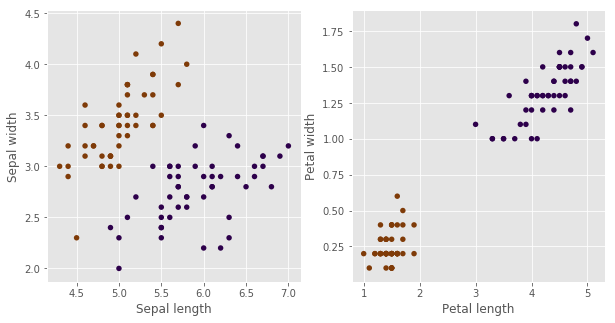

In [274]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [179]:
pred_iris = Clustering().fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))

Adjusted Rand index for iris is: 1.00


In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5).fit_predict(x_iris)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, dbscan))

Adjusted Rand index for iris is: 1.00


In [183]:
%time pred_iris = Clustering().fit_predict(x_iris)

Wall time: 277 ms


In [184]:
%time dbscan = DBSCAN(eps=1, min_samples=5).fit_predict(x_iris)

Wall time: 4 ms


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [136]:
#%%pycodestyle
# Silhouette


def quality(X, labels):
    """
    Implement quality criterion of your choice
    """
    silhouette = 0
    for j in range(len(X)):
        silhouette += single_silhouette(X, labels, j)

    return silhouette / len(X)

def single_silhouette(X, labels, j):

    a_i = 0
    a_num = 0
    clust_dist = {}
    clust_num = {}

    clusters = np.unique(labels)
    for c in clusters:
        clust_dist[c] = 0
        clust_num[c] = 0

    for i in range(len(X)):
        if labels[i] == labels[j] and i != j:
            a_i += np.linalg.norm(X[i] - X[j])
            a_num += 1

        elif labels[i] != labels[j]:
            k = 0
            while labels[i] != clusters[k]:
                k += 1

            clust_dist[clusters[k]] += np.linalg.norm(X[i] - X[j])
            clust_num[clusters[k]] += 1

    if a_i != 0:
        a_i /= a_num
    for i in clust_dist:
        if clust_num[i] != 0:
            clust_dist[i] /= clust_num[i]
        if clust_dist[i] == 0:
            clust_dist[i] = math.inf

    key_min = min(clust_dist.keys(), key=(lambda k: clust_dist[k]))
    b_i = clust_dist[key_min]

    return (b_i - a_i) / max(a_i, b_i)

In [137]:
smt.silhouette_score(x_iris, pred_iris)

0.7369368160231737

In [138]:
quality(x_iris, pred_iris)

0.7369368160680052

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

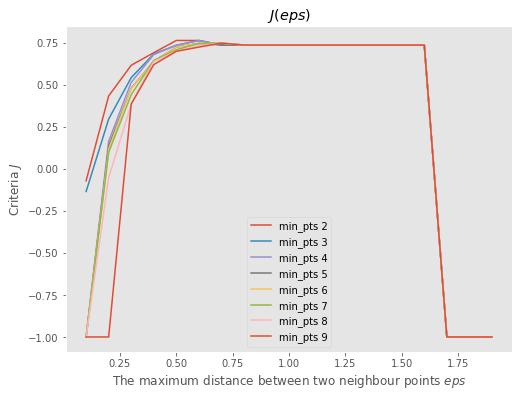

In [287]:
epss = np.arange(0.1, 2, 0.1)
nbrs = np.arange(2, 10)
criteria = np.zeros((len(epss), len(nbrs)))

for i, k in enumerate(epss):
    for j, n in enumerate(nbrs):
        cls = Clustering(eps=k, min_pts=n)
        y = cls.fit_predict(x_iris)
        criteria[i, j] = quality(x_iris, y)

pl.figure(figsize=(8, 6))
for i, m in enumerate(nbrs):
    pl.plot(epss, criteria[:, i], label='min_pts ' + str(m))

pl.legend()
pl.title("$J(eps)$")
pl.ylabel("Criteria $J$")
pl.xlabel("The maximum distance between two neighbour points $eps$")
pl.grid()
pl.show()

In [285]:
# Задание 3
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/User/Downloads/WDI_csv/WDIData.csv")
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,85.189815,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.541696,74.507470,75.652712,76.628320,78.663736,77.439066,78.355520,78.743207,NaN,NaN


In [157]:
year = df.count().iloc[4:].idxmax()
df2 = df.loc[:, ['Country Name', 'Indicator Name', year]]
df2 = df2.pivot(index='Country Name', columns='Indicator Name', values=year)
df2.head()

Indicator Name,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",...,"Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,20.68,42.700000,32.400000,82.800000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.642105
Albania,NaN,NaN,NaN,65.23,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.373536
Algeria,NaN,NaN,NaN,92.41,98.884972,97.594271,99.505684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.078491
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,100.00,100.000000,100.000000,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [299]:
np.array(df2.count() >= 262).sum()

5

In [300]:
df_ = df2.iloc[:, np.array(df2.count() >= 262)]
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [301]:
df_ = df_.fillna(df_.mean())
df_ = df_.dropna(axis=1, how='all')
df_.head()

Indicator Name,Land area (sq. km),Population density (people per sq. km of land area),Population growth (annual %),"Population, total",Surface area (sq. km)
Country Name,,,,,
Afghanistan,652860.0,44.118443,2.812617,28803167.0,652860.0
Albania,27400.0,106.314635,-0.496462,2913021.0,28750.0
Algeria,2381740.0,15.164391,1.821358,36117637.0,2381740.0
American Samoa,200.0,278.185000,-1.054862,55637.0,200.0
Andorra,470.0,179.678723,-0.015393,84449.0,470.0


In [302]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(df_)
x.shape

(264, 5)

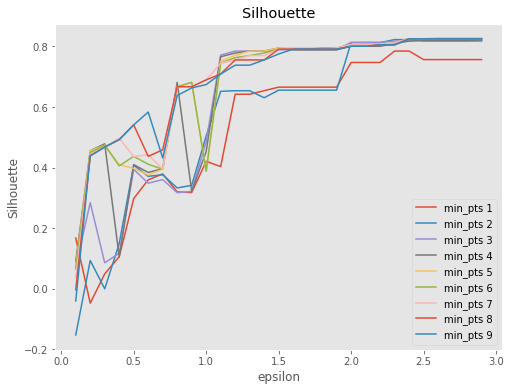

In [185]:
epsilons = np.arange(0.1, 3, 0.1)
min_ptss = np.arange(1, 10)
criteria = np.zeros((len(epsilons), len(min_ptss)))

for i, e in enumerate(epsilons):
    for j, m in enumerate(min_ptss):
        cls = Clustering(eps=e, min_pts=m)
        y = cls.fit_predict(x)
        criteria[i, j] = quality(x, y)

pl.figure(figsize=(8, 6))
for j, m in enumerate(min_ptss):
    pl.plot(epsilons, criteria[:, j], label='min_pts ' + str(m))
pl.legend()
pl.title("Silhouette")
pl.ylabel("Silhouette")
pl.xlabel("epsilon")
pl.grid()
pl.show()

In [303]:
cls = Clustering(eps=0.11, min_pts=3)
y = cls.fit_predict(x)

countries = list(df_.index)
print(y)

[1, 2, -1, -1, 2, -1, 2, -1, -1, 2, 5, -1, 2, 2, 3, -1, -1, 5, 2, 2, 3, 1, -1, 3, 3, 2, 3, -1, 1, 2, 2, 1, -1, 2, 3, 1, -1, 2, 3, 2, 2, 1, -1, 2, -1, 2, -1, -1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, -1, -1, -1, -1, 3, 3, 2, -1, 3, 2, 1, -1, -1, -1, -1, -1, 2, 2, 2, -1, 2, 2, 1, 1, -1, -1, 3, -1, 2, 2, 2, 2, 3, 3, 3, 2, -1, -1, -1, 3, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, 2, 1, 2, 2, 3, 2, 2, -1, -1, -1, 1, 3, 2, -1, 2, -1, 2, 3, -1, 4, 4, 4, -1, -1, -1, 2, -1, -1, 2, -1, -1, -1, -1, 3, -1, 2, 1, 1, 3, -1, 1, -1, 2, 1, 5, -1, 2, -1, -1, -1, -1, 2, -1, 3, 2, 2, 1, 2, 3, -1, 2, -1, 3, 2, 2, -1, 1, -1, -1, 2, -1, -1, -1, -1, 2, -1, 2, 3, 3, 2, 2, -1, 2, 2, -1, -1, -1, -1, 2, -1, -1, 2, 2, 3, -1, 1, 2, 1, 3, -1, -1, 2, 2, -1, 3, 1, 2, -1, -1, -1, 2, 2, 2, 2, 2, 2, 6, 6, 6, -1, 2, 3, 2, 2, 2, 3, 1, 2, 3, 1, 2, 2, 2, 2, 3, 3, 2, -1, 2, -1, 2, -1, -1, 2, 1, 3, 3, 2, 2, -1, -1, 1, 1, 3]


In [253]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2).fit_transform(x)

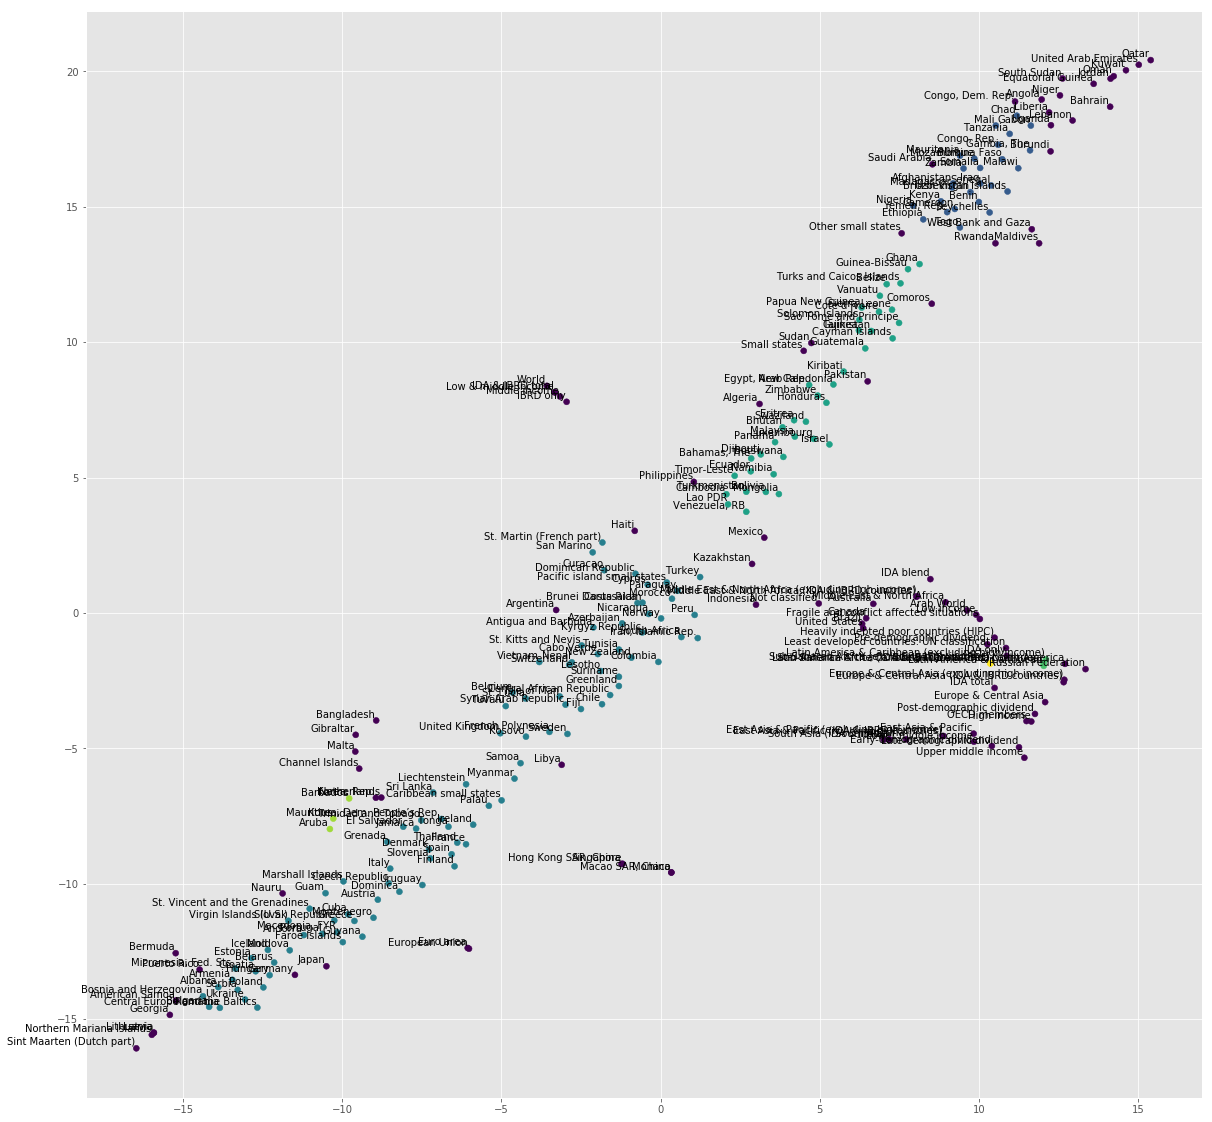

In [306]:
pl.figure(figsize=(20, 20))
pl.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
for label, i, j in zip(countries, x_tsne[:, 0], x_tsne[:, 1]):
    pl.annotate(
        label,
        xy=(i, j), xytext=(-1, 1),
        textcoords='offset points', ha='right', va='bottom',
    )

pl.show()

In [255]:
for i in range(len(countries)):
    if y[i] == 1:
        print(countries[i])

Afghanistan
Benin
British Virgin Islands
Burkina Faso
Cameroon
Chad
Congo, Rep.
Ethiopia
Gabon
Gambia, The
Iraq
Kenya
Madagascar
Malawi
Mali
Mauritania
Mozambique
Nigeria
Senegal
Seychelles
Somalia
Tanzania
Togo
Uzbekistan
Yemen, Rep.
Zambia


In [256]:
for i in range(len(countries)):
    if y[i] == 2:
        print(countries[i])

Albania
Andorra
Antigua and Barbuda
Armenia
Austria
Azerbaijan
Belarus
Belgium
Bosnia and Herzegovina
Brunei Darussalam
Bulgaria
Cabo Verde
Caribbean small states
Central African Republic
Central Europe and the Baltics
Chile
Colombia
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Dominica
Dominican Republic
El Salvador
Estonia
Faroe Islands
Fiji
Finland
France
French Polynesia
Greece
Greenland
Grenada
Guam
Guyana
Hungary
Iceland
Iran, Islamic Rep.
Ireland
Isle of Man
Italy
Jamaica
Korea, Dem. People’s Rep.
Kosovo
Kyrgyz Republic
Lesotho
Liechtenstein
Macedonia, FYR
Marshall Islands
Micronesia, Fed. Sts.
Moldova
Montenegro
Morocco
Myanmar
Nepal
New Zealand
Nicaragua
Norway
Pacific island small states
Palau
Paraguay
Peru
Poland
Portugal
Romania
Samoa
Serbia
Slovak Republic
Slovenia
South Africa
Spain
Sri Lanka
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Suriname
Sweden
Switzerland
Syrian Arab Republic
Thailand
Tonga
Trinidad and Tobago
Tunisia
Turkey
Tuval

In [257]:
for i in range(len(countries)):
    if y[i] == 3:
        print(countries[i])

Bahamas, The
Belize
Bhutan
Bolivia
Botswana
Cambodia
Cayman Islands
Cote d'Ivoire
Djibouti
Ecuador
Eritrea
Ghana
Guatemala
Guinea
Guinea-Bissau
Honduras
Israel
Kiribati
Lao PDR
Luxembourg
Malaysia
Mongolia
Namibia
New Caledonia
Panama
Papua New Guinea
Sao Tome and Principe
Sierra Leone
Solomon Islands
Swaziland
Tajikistan
Timor-Leste
Turkmenistan
Turks and Caicos Islands
Vanuatu
Venezuela, RB
Zimbabwe


In [258]:
for i in range(len(countries)):
    if y[i] == 4:
        print(countries[i])

Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)


In [260]:
for i in range(len(countries)):
    if y[i] == 5:
        print(countries[i])

Sub-Saharan Africa
Sub-Saharan Africa (IDA & IBRD countries)
Sub-Saharan Africa (excluding high income)


In [259]:
for i in range(len(countries)):
    if y[i] == -1:
        print(countries[i])

Algeria
American Samoa
Angola
Arab World
Argentina
Aruba
Australia
Bahrain
Bangladesh
Barbados
Bermuda
Brazil
Burundi
Canada
Channel Islands
China
Comoros
Congo, Dem. Rep.
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
Egypt, Arab Rep.
Equatorial Guinea
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding high income)
European Union
Fragile and conflict affected situations
Georgia
Germany
Gibraltar
Haiti
Heavily indebted poor countries (HIPC)
High income
Hong Kong SAR, China
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
India
Indonesia
Japan
Jordan
Kazakhstan
Korea, Rep.
Kuwait
Late-demographic dividend
Latvia
Least developed countries: UN classification
Lebanon
Liberia
Libya
Lithuania
Low & middle income
Low income
Lower middle income
Macao SAR, China
Maldives
Malta
Mauritius
Mexico
Middle East & North Africa
Middle East & North Afri

In [228]:
# Задание 4

Хоть сколь-нибудь адекватное разбиение на кластеры удалось получить, оставив лишь только признаки, имеющие самое большое заполнение: площадь территории, плотность населения, относительный рост населения, население, полная площадь контролируемой поверхности Земли.

Распределение стран (и регионов) по кластерам:

1-й кластер: 
Afghanistan, Benin
British Virgin Islands
Burkina Faso
Cameroon
Chad
Congo, Rep.
Ethiopia
Gabon
Gambia, The
Iraq
Kenya
Madagascar
Malawi
Mali
Mauritania
Mozambique
Nigeria
Senegal
Seychelles
Somalia
Tanzania
Togo
Uzbekistan
Yemen, Rep.
Zambia. 

Этот кластер можно назвать кластером третьего мира. В него попали многие страны Африки и две ближневосточные, примерно им соответствующие.

2-й: Albania
Andorra
Antigua and Barbuda
Armenia
Austria
Azerbaijan
Belarus
Belgium
Bosnia and Herzegovina
Brunei Darussalam
Bulgaria
Cabo Verde
Caribbean small states
Central African Republic
Central Europe and the Baltics
Chile
Colombia
Costa Rica
Croatia
Cuba
Curacao
Cyprus
Czech Republic
Denmark
Dominica
Dominican Republic
El Salvador
Estonia
Faroe Islands
Fiji
Finland
France
French Polynesia
Greece
Greenland
Grenada
Guam
Guyana
Hungary
Iceland
Iran, Islamic Rep.
Ireland
Isle of Man
Italy
Jamaica
Korea, Dem. People’s Rep.
Kosovo
Kyrgyz Republic
Lesotho
Liechtenstein
Macedonia, FYR
Marshall Islands
Micronesia, Fed. Sts.
Moldova
Montenegro
Morocco
Myanmar
Nepal
New Zealand
Nicaragua
Norway
Pacific island small states
Palau
Paraguay
Peru
Poland
Portugal
Romania
Samoa
Serbia
Slovak Republic
Slovenia
South Africa
Spain
Sri Lanka
St. Kitts and Nevis
St. Lucia
St. Vincent and the Grenadines
Suriname
Sweden
Switzerland
Syrian Arab Republic
Thailand
Tonga
Trinidad and Tobago
Tunisia
Turkey
Tuvalu
Ukraine
United Kingdom
Uruguay
Vietnam
Virgin Islands (U.S.).

"Европейский" кластер. Также присутствуют некоторые латиноамериканские и африканские страны, примерно соответсвующие европейским по указанным выше критериям.

3-й кластер:
Bahamas, The
Belize
Bhutan
Bolivia
Botswana
Cambodia
Cayman Islands
Cote d'Ivoire
Djibouti
Ecuador
Eritrea
Ghana
Guatemala
Guinea
Guinea-Bissau
Honduras
Israel
Kiribati
Lao PDR
Luxembourg
Malaysia
Mongolia
Namibia
New Caledonia
Panama
Papua New Guinea
Sao Tome and Principe
Sierra Leone
Solomon Islands
Swaziland
Tajikistan
Timor-Leste
Turkmenistan
Turks and Caicos Islands
Vanuatu
Venezuela, RB
Zimbabwe

Еще немного третьего мира из Африки и Азии.

Кластеры 4 и 5 состоят каждый из трех (а на самом деле одного) регионов. К некласифицированным (-1-й кластер) странам не отнеслись как раз из-за своего тройного присутствия в датасете (так как по понятным причинамлежали друг к другу экстремально близко). 

4-й: Latin America & Caribbean
Latin America & Caribbean (excluding high income)
Latin America & the Caribbean (IDA & IBRD countries)

5-й:
Sub-Saharan Africa
Sub-Saharan Africa (IDA & IBRD countries)
Sub-Saharan Africa (excluding high income)

К выбросам было причислено достаточно много непохожих по географическо-демографическим параметрам стран и регионов, среди которых нашлось место и для ультимативного региона World:

Algeria
American Samoa
Angola
Arab World
Argentina
Aruba
Australia
Bahrain
Bangladesh
Barbados
Bermuda
Brazil
Burundi
Canada
Channel Islands
China
Comoros
Congo, Dem. Rep.
Early-demographic dividend
East Asia & Pacific
East Asia & Pacific (IDA & IBRD countries)
East Asia & Pacific (excluding high income)
Egypt, Arab Rep.
Equatorial Guinea
Euro area
Europe & Central Asia
Europe & Central Asia (IDA & IBRD countries)
Europe & Central Asia (excluding high income)
European Union
Fragile and conflict affected situations
Georgia
Germany
Gibraltar
Haiti
Heavily indebted poor countries (HIPC)
High income
Hong Kong SAR, China
IBRD only
IDA & IBRD total
IDA blend
IDA only
IDA total
India
Indonesia
Japan
Jordan
Kazakhstan
Korea, Rep.
Kuwait
Late-demographic dividend
Latvia
Least developed countries: UN classification
Lebanon
Liberia
Libya
Lithuania
Low & middle income
Low income
Lower middle income
Macao SAR, China
Maldives
Malta
Mauritius
Mexico
Middle East & North Africa
Middle East & North Africa (IDA & IBRD countries)
Middle East & North Africa (excluding high income)
Middle income
Monaco
Nauru
Netherlands
Niger
North America
Northern Mariana Islands
Not classified
OECD members
Oman
Other small states
Pakistan
Philippines
Post-demographic dividend
Pre-demographic dividend
Puerto Rico
Qatar
Russian Federation
Rwanda
San Marino
Saudi Arabia
Singapore
Sint Maarten (Dutch part)
Small states
South Asia
South Asia (IDA & IBRD)
South Sudan
St. Martin (French part)
Sudan
Uganda
United Arab Emirates
United States
Upper middle income
West Bank and Gaza
World

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.